# Python Class for State-Task Networks

The State-Task Network (STN) is an approach to modeling multipurpose batch process for the purpose of short term scheduling. It was first developed by Kondili, et al., in 1993, and subsequently developed and extended by others. 

### References

Chu, Y., Wassick, J. M., & You, F. (2013). Efficient scheduling method of complex batch processes with general network structure via agent‐based modeling. AIChE Journal, 59(8), 2884-2906.

## Example (Chu, et al., 2013)

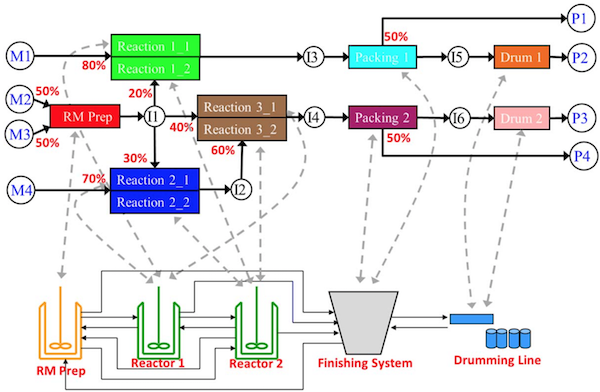

## Encoding the STN data

The basic data structure specifies the states, tasks, and units comprising a state-task network. The intention is for all relevant problem data to be contained in a single dictionary structure that can be prepared directly from a state-task network diagram. The dictionary has the following required key-value pairs:

* ``data['STATES']`` is a dictionary of key-value pairs. The key is the name of the state, the value is a dictionary with fields containing ``capacity``, an initial value ``initial``, and a price for the contents ``price``.

In [44]:
import numpy as np

N = 240
H = 6*N

ChuExample = {
    'TIME': np.linspace(0,H,N+1),
    'STATES': {
        'M1': {'capacity': 500, 'initial': 500, 'price': 0},
        'M2': {'capacity': 500, 'initial': 500, 'price': 0},
        'M3': {'capacity': 500, 'initial': 500, 'price': 0},
        'M4': {'capacity': 500, 'initial': 500, 'price': 0},
        'I1': {'capacity': 100, 'initial':   0, 'price': 0},
        'I2': {'capacity': 100, 'initial':   0, 'price': 0},
        'I3': {'capacity': 100, 'initial':   0, 'price': 0},
        'I4': {'capacity': 100, 'initial':   0, 'price': 0},
        'I5': {'capacity': 100, 'initial':   0, 'price': 0},
        'I6': {'capacity': 100, 'initial':   0, 'price': 0},
        'P1': {'capacity': 500, 'initial':   0, 'price': 0},
        'P2': {'capacity': 500, 'initial':   0, 'price': 0},
        'P3': {'capacity': 500, 'initial':   0, 'price': 0},
        'P4': {'capacity': 500, 'initial':   0, 'price': 0},
    },
    'ST_ARCS': {
        ('M1', 'Reaction_1') : {'rho': 0.8},
        ('M2', 'RM Prep')    : {'rho': 0.5},
        ('M3', 'RM Prep')    : {'rho': 0.5},
        ('M4', 'Reaction_2') : {'rho': 0.7},
        ('I1', 'Reaction_1') : {'rho': 0.2},
        ('I1', 'Reaction_2') : {'rho': 0.3},
        ('I1', 'Reaction_3') : {'rho': 0.4},
        ('I2', 'Reaction_3') : {'rho': 0.6},
        ('I3', 'Packing_1')  : {'rho': 1.0},
        ('I4', 'Packing_2')  : {'rho': 1.0},
        ('I5', 'Drum_1')     : {'rho': 1.0},
        ('I6', 'Drum_2')     : {'rho': 1.0},
    },
    'TS_ARCS': {
        ('RM Prep', 'I1')    : {'rho': 1.0, 'dur':  72},
        ('Reaction_1', 'I3') : {'rho': 1.0, 'dur': 162},
        ('Reaction_2', 'I2') : {'rho': 1.0, 'dur': 138},
        ('Reaction_3', 'I4') : {'rho': 1.0, 'dur': 162},
        ('Packing_1', 'P1')  : {'rho': 0.5, 'dur': 108},
        ('Packing_1', 'I5')  : {'rho': 0.5, 'dur': 108},
        ('Packing_2', 'I6')  : {'rho': 0.5, 'dur': 108},
        ('Packing_2', 'P4')  : {'rho': 0.5, 'dur': 108},
        ('Drum_1', 'P2')     : {'rho': 1.0, 'dur':  90},
        ('Drum_2', 'P3')     : {'rho': 1.0, 'dur':  90},
    },
    'UNIT_TASKS' : {
        ('RM Prep','RM Prep')       : {'Bmin': 0, 'Bmax': 100, 'Cost': 1000, 'vCost':  50, 'Tclean': 0},
        ('Reactor_1', 'Reaction_1') : {'Bmin': 0, 'Bmax':  80, 'Cost': 3000, 'vCost': 250, 'Tclean': 0},
        ('Reactor_1', 'Reaction_2') : {'Bmin': 0, 'Bmax':  50, 'Cost': 1500, 'vCost': 150, 'Tclean': 0},
        ('Reactor_1', 'Reaction_3') : {'Bmin': 0, 'Bmax':  80, 'Cost': 2000, 'vCost': 100, 'Tclean': 0},
        ('Reactor_2', 'Reaction_1') : {'Bmin': 0, 'Bmax':  80, 'Cost': 3000, 'vCost': 250, 'Tclean': 0},
        ('Reactor_2', 'Reaction_2') : {'Bmin': 0, 'Bmax':  50, 'Cost': 1500, 'vCost': 150, 'Tclean': 0},
        ('Reactor_2', 'Reaction_3') : {'Bmin': 0, 'Bmax':  80, 'Cost': 2000, 'vCost': 100, 'Tclean': 0},
        ('Finishing', 'Packing_1')  : {'Bmin': 0, 'Bmax': 100, 'Cost':  500, 'vCost':  20, 'Tclean': 0},
        ('Finishing', 'Packing_2')  : {'Bmin': 0, 'Bmax': 100, 'Cost':  500, 'vCost':  20, 'Tclean': 0},
        ('Drumming', 'Drum_1')      : {'Bmin': 0, 'Bmax':  50, 'Cost':  200, 'vCost':  50, 'Tclean': 0},
        ('Drumming', 'Drum_2')      : {'Bmin': 0, 'Bmax':  50, 'Cost':  200, 'vCost':  50, 'Tclean': 0},        
    },
    'TURNAROUND' : {
        ('Reaction_1', 'Reaction_1') : 12,
        ('Reaction_1', 'Reaction_2') : 30,
        ('Reaction_1', 'Reaction_3') : 30,
        ('Reaction_2', 'Reaction_1') : 30,
        ('Reaction_2', 'Reaction_2') : 12,
        ('Reaction_2', 'Reaction_3') :  6,
        ('Reaction_3', 'Reaction_1') : 30,
        ('Reaction_3', 'Reaction_2') : 30,
        ('Reaction_3', 'Reaction_3') : 12,
        ('Packing_1', 'Packing_1')   : 0,
        ('Packing_1', 'Packing_2')   : 6,
        ('Packing_2', 'Packing_1')   : 6,
        ('Packing_1', 'Packing_1')   : 0,
    },
    'PRODUCTION' : {
        ('P1',H) : 200,
        ('P2',H) : 200,
        ('P3',H) : 100,
        ('P4',H) : 100,
    }
}

In [27]:
%matplotlib inline
from pyomo.environ import *
import matplotlib.pyplot as plt

class STN:
    def __init__(self,data):
        self.stale = True
        self.TIME = data['TIME']
        self.STATES = data['STATES']
        self.ST_ARCS = data['ST_ARCS']
        self.TS_ARCS = data['TS_ARCS']
        self.UNIT_TASKS = data['UNIT_TASKS']
        
        if 'TURNAROUND' in data.keys():
            self.TURNAROUND = data['TURNAROUND']
        else:
            self.TURNAROUND = ''
            
        if 'PRODUCTION' in data.keys():
            self.PRODUCTION = data['PRODUCTION']
        else:
            self.PRODUCTION = ''
        
        self.H = max(self.TIME)

        self.TASKS = set([i for (j,i) in self.UNIT_TASKS])

        # S[i] input set of states which feed task i
        self.S = {i: set() for i in self.TASKS}
        for (s,i) in self.ST_ARCS:
            self.S[i].add(s)
            
        # S_[i] output set of states fed by task i
        self.S_ = {i: set() for i in self.TASKS}
        for (i,s) in self.TS_ARCS:
            self.S_[i].add(s)

        # rho[(i,s)] input fraction of task i from state s
        self.rho = {(i,s): self.ST_ARCS[(s,i)]['rho'] for (s,i) in self.ST_ARCS}

        # rho_[(i,s)] output fraction of task i to state s
        self.rho_ = {(i,s): self.TS_ARCS[(i,s)]['rho'] for (i,s) in self.TS_ARCS}

        # P[(i,s)] time for task i output to state s
        self.P = {(i,s): self.TS_ARCS[(i,s)]['dur'] for (i,s) in self.TS_ARCS}

        # p[i] completion time for task i
        self.p = {i: max([self.P[(i,s)] for s in self.S_[i]]) for i in self.TASKS}

        # K[i] set of unit capable of task i
        self.K = {i: set() for i in self.TASKS}
        for (j,i) in self.UNIT_TASKS:
            self.K[i].add(j) 
            
        # T[s] set of tasks receiving material from state s 
        self.T = {s: set() for s in self.STATES}
        for (s,i) in self.ST_ARCS:
            self.T[s].add(i)

        # set of tasks producing material for state s
        self.T_ = {s: set() for s in self.STATES}
        for (i,s) in self.TS_ARCS:
            self.T_[s].add(i)

        # C[s] storage capacity for state s
        self.C = {s: self.STATES[s]['capacity'] for s in self.STATES}
        
        self.UNITS = set([j for (j,i) in self.UNIT_TASKS])

        # I[j] set of tasks performed with unit j
        self.I = {j: set() for j in self.UNITS}
        for (j,i) in self.UNIT_TASKS:
            self.I[j].add(i)

        # Bmax[(i,j)], Bmin[(i,j)] are max and min capacity of unit j for task i
        self.Bmax = {(i,j):self.UNIT_TASKS[(j,i)]['Bmax'] for (j,i) in self.UNIT_TASKS}
        self.Bmin = {(i,j):self.UNIT_TASKS[(j,i)]['Bmin'] for (j,i) in self.UNIT_TASKS}
        
        # create Pyomo model
        
        self.model = ConcreteModel()
        model = self.model
        model.cons = ConstraintList()
        
        # W[i,j,t] 1 if task i starts in unit j at time t
        model.W = Var(self.TASKS, self.UNITS, self.TIME, domain=Boolean)
        
        # B[i,j,t,] size of batch assigned to task i in unit j at time t
        model.B = Var(self.TASKS, self.UNITS, self.TIME, domain=NonNegativeReals)
        
        # S[s,t] inventory of state s at time t
        model.S = Var(self.STATES.keys(), self.TIME, domain=NonNegativeReals)
        
        # Q[j,t] inventory of unit j at time t
        model.Q = Var(self.UNITS, self.TIME, domain=NonNegativeReals)

        # Objective is to maximize the value of the final state (see Kondili, Sec. 5)
        model.Cost = Var(domain=NonNegativeReals)
        model.Value = Var(domain=NonNegativeReals)
        model.cons.add(model.Value == sum([self.STATES[s]['price']*model.S[s,self.H] for s in self.STATES]))
        model.cons.add(model.Cost == sum([self.UNIT_TASKS[(j,i)]['Cost']*model.W[i,j,t] +
                                  self.UNIT_TASKS[(j,i)]['vCost']*model.B[i,j,t] for i in self.TASKS for j in self.K[i] for t in self.TIME])) 
        model.Obj = Objective(expr = model.Value - model.Cost, sense = maximize)
        
        # unit constraints
        for j in self.UNITS:
            rhs = 0
            for t in self.TIME:
                # a unit can only be allocated to one task 
                lhs = 0
                for i in self.I[j]:
                    for tprime in self.TIME[(self.TIME <= t) & (self.TIME >= t-self.p[i]+1-self.UNIT_TASKS[(j,i)]['Tclean'])]:
                        lhs += model.W[i,j,tprime]
                model.cons.add(lhs <= 1)

                # capacity constraints (see Konkili, Sec. 3.1.2)
                for i in self.I[j]:
                    model.cons.add(model.W[i,j,t]*self.Bmin[i,j] <= model.B[i,j,t])
                    model.cons.add(model.B[i,j,t] <= model.W[i,j,t]*self.Bmax[i,j])

                # unit mass balance
                rhs += sum([model.B[i,j,t] for i in self.I[j]])
                for i in self.I[j]:
                    for s in self.S_[i]:
                        if t >= self.P[(i,s)]:
                            rhs -= self.rho_[(i,s)]*model.B[i,j,max(self.TIME[self.TIME <= t-self.P[(i,s)]])]
                model.cons.add(model.Q[j,t] == rhs)
                rhs = model.Q[j,t]
        
            # turnaround constraints
            for (i1,i2) in self.TURNAROUND:
                if (i1 in self.I[j]) and (i2 in self.I[j]):
                    for t1 in self.TIME[self.TIME <= (self.H - self.p[i1])]:
                        for t2 in self.TIME[(self.TIME >= t1 + self.p[i1])
                                            & (self.TIME < t1 + self.p[i1] + self.TURNAROUND[(i1,i2)])]: 
                            model.cons.add(model.W[i1,j,t1] + model.W[i2,j,t2] <= 1)

            # terminal condition  
            model.cons.add(model.Q[j,self.H] == 0)

        # state constraints
        for s in self.STATES.keys():
            rhs = self.STATES[s]['initial']
            for t in self.TIME:
                # state capacity constraint
                model.cons.add(model.S[s,t] <= self.C[s])
        
                # state mass balanace
                for i in self.T_[s]:
                    for j in self.K[i]:
                        if t >= self.P[(i,s)]: 
                            rhs += self.rho_[(i,s)]*model.B[i,j,max(self.TIME[self.TIME <= t-self.P[(i,s)]])]             
                for i in self.T[s]:
                    rhs -= self.rho[(i,s)]*sum([model.B[i,j,t] for j in self.K[i]])
                model.cons.add(model.S[s,t] == rhs)
                rhs = model.S[s,t] 

    def solve(self,solver='glpk'):
        solver = SolverFactory(solver)
        solver.solve(self.model).write()
        print()
        print("Value of State Inventories = {0:12.2f}".format(self.model.Value()))
        print("  Cost of Unit Assignments = {0:12.2f}".format(self.model.Cost()))
        print("             Net Objective = {0:12.2f}".format(self.model.Value() - self.model.Cost()))
        self.stale = False
        
        
    def plot(self):
        if self.stale:
            print('Solve model before attempting to plot results.')
            return
        STATES = self.STATES
        model = self.model
        TIME = self.TIME
        C = self.C
        H = self.H

        plt.figure(figsize=(12,8))
        for (s,idx) in zip(STATES.keys(),range(0,len(STATES.keys()))):
            plt.subplot(ceil(len(STATES.keys())/3),3,idx+1)
            tlast,ylast = 0,STATES[s]['initial']
            for (t,y) in zip(list(TIME),[model.S[s,t]() for t in TIME]):
                plt.plot([tlast,t,t],[ylast,ylast,y],'b')
                #plt.plot([tlast,t],[ylast,y],'b.',ms=10)
                tlast,ylast = t,y
            plt.ylim(0,1.1*C[s])
            plt.plot([0,H],[C[s],C[s]],'r--')
            plt.title(s)
        plt.tight_layout()
        
    def gantt(self):
        STATES = self.STATES
        model = self.model
        TIME = self.TIME
        UNITS = self.UNITS
        C = self.C
        H = self.H
        I = self.I
        p = self.p
        plt.figure(figsize=(12,6))

        gap = H/400
        idx = 1
        lbls = []
        ticks = []
        for j in sorted(UNITS):
            idx -= 1
            for i in sorted(I[j]):
                idx -= 1
                ticks.append(idx)
                lbls.append("{0:s} -> {1:s}".format(j,i))
                plt.plot([0,H],[idx,idx],lw=20,alpha=.3,color='y')
                for t in TIME:
                    if model.W[i,j,t]() > 0:
                        plt.plot([t,t+p[i]], [idx,idx],'r', lw=20, alpha=0.5, solid_capstyle='butt')
                        plt.plot([t+gap,t+p[i]-gap], [idx,idx],'b', lw=16, solid_capstyle='butt')
                        txt = "{0:.2f}".format(model.B[i,j,t]())
                        plt.text(t+p[i]/2, idx, txt, color='white', weight='bold', ha='center', va='center')
        plt.xlim(0,H)
        plt.gca().set_yticks(ticks)
        plt.gca().set_yticklabels(lbls);
        
    def results(self):
        return
    
    def trace(self):
        return

In [28]:
chu = STN(ChuExample)
N = 145
H = 6*N
chu.TIME = np.linspace(0,H,N+1)
chu.H = H

chu.model.cons.add(chu.model.S['P1',chu.H] >= 100)
chu.model.cons.add(chu.model.S['P2',chu.H] >= 100)
chu.model.cons.add(chu.model.S['P3',chu.H] >= 50)
chu.model.cons.add(chu.model.S['P4',chu.H] >= 50)

chu.solve('gurobi')

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x23862
  Lower bound: -106500.0
  Upper bound: -106500.0
  Number of objectives: 1
  Number of constraints: 14472
  Number of variables: 9884
  Number of binary variables: 2651
  Number of integer variables: 2651
  Number of continuous variables: 7233
  Number of nonzeros: 91473
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: Model was 

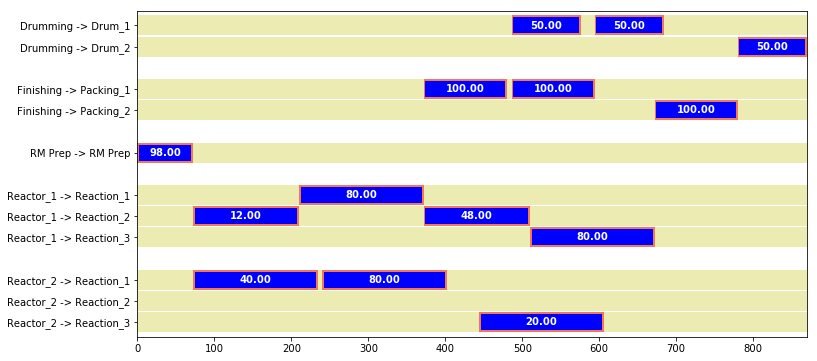

In [29]:
chu.gantt()

### State Inventories

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML

#pd.DataFrame([[model.S[s,t]() for s in STATES.keys()] for t in TIME], columns = STATES.keys(), index = TIME)

In [ ]:
plt.figure(figsize=(12,8))
for (s,idx) in zip(STATES.keys(),range(0,len(STATES.keys()))):
    plt.subplot(ceil(len(STATES.keys())/3),3,idx+1)
    tlast,ylast = 0,STATES[s]['initial']
    for (t,y) in zip(list(TIME),[model.S[s,t]() for t in TIME]):
        plt.plot([tlast,t,t],[ylast,ylast,y],'b')
        #plt.plot([tlast,t],[ylast,y],'b.',ms=10)
        tlast,ylast = t,y
    plt.ylim(0,1.1*C[s])
    plt.plot([0,H],[C[s],C[s]],'r--')
    plt.title(s)
plt.tight_layout()

### Unit Assignment

In [ ]:
UnitAssignment = pd.DataFrame({j:[None for t in TIME] for j in UNITS},index=TIME)

for t in TIME:
    for j in UNITS:
        for i in I[j]:
            for s in S_[i]:
                if t-p[i] >= 0:
                    if model.W[i,j,max(TIME[TIME <= t-p[i]])]() > 0:
                        UnitAssignment.loc[t,j] = None               
        for i in I[j]:
            if model.W[i,j,t]() > 0:
                UnitAssignment.loc[t,j] = (i,model.B[i,j,t]())

#UnitAssignment

### Unit Batch Inventories

In [ ]:
#pd.DataFrame([[model.Q[j,t]() for j in UNITS] for t in TIME], columns = UNITS, index = TIME)

### Gannt Chart

## Trace of Events and States

In [ ]:
print("Starting Conditions")
print("    Initial Inventories:")            
for s in STATES.keys():
        print("        {0:10s}  {1:6.1f} kg".format(s,STATES[s]['initial']))
        
units = {j:{'assignment':'None', 't':0} for j in UNITS}

for t in TIME:
    print("\nTime =",t,"hr")
    print("    Instructions:")
    for j in UNITS:
        units[j]['t'] += 1
        # transfer from unit to states
        for i in I[j]:  
            for s in S_[i]:
                if t-P[(i,s)] >= 0:
                    amt = rho_[(i,s)]*model.B[i,j,max(TIME[TIME <= t - P[(i,s)]])]()
                    if amt > 0:
                        print("        Transfer", amt, "kg from", j, "to", s)
    for j in UNITS:
        # release units from tasks
        for i in I[j]:
            if t-p[i] >= 0:
                if model.W[i,j,max(TIME[TIME <= t-p[i]])]() > 0:
                    print("        Release", j, "from", i)
                    units[j]['assignment'] = 'None'
                    units[j]['t'] = 0
        # assign units to tasks             
        for i in I[j]:
            if model.W[i,j,t]() > 0:
                print("        Assign", j, "with capacity", Vmax[(i,j)], "kg to task",i,"for",p[i],"hours")
                units[j]['assignment'] = i
                units[j]['t'] = 1
        # transfer from states to starting tasks
        for i in I[j]:
            for s in S[i]:
                amt = rho[(i,s)]*model.B[i,j,t]()
                if amt > 0:
                    print("        Transfer", amt,"kg from", s, "to", j)
    print("\n    Inventories are now:")            
    for s in STATES.keys():
        print("        {0:10s}  {1:6.1f} kg".format(s,model.S[s,t]()))
    print("\n    Unit Assignments are now:")
    for j in UNITS:
        if units[j]['assignment'] != 'None':
            fmt = "        {0:s} performs the {1:s} task with a {2:.2f} kg batch for hour {3:d} of {4:d}"
            i = units[j]['assignment']
            print(fmt.format(j,i,model.Q[j,t](),units[j]['t'],p[i]))